In [1]:
import warnings
import numpy as np
import numba
import matplotlib.pyplot as plt
from coffea.nanoevents import NanoEventsFactory
import awkward as ak
import pandas as pd
import json
import os

from helpers import *

/cvmfs/cms.cern.ch/slc7_amd64_gcc10/external/py3-setuptools/60.9.3-ddcab3b6a742c72fed5554de8ccaaf18/lib/python3.9/site-packages/_distutils_hack/__init__.py:17: UserWarning: Distutils was imported before Setuptools, but importing Setuptools also replaces the `distutils` module in `sys.modules`. This may lead to undesirable behaviors or errors. To avoid these issues, avoid using distutils directly, ensure that setuptools is installed in the traditional way (e.g. not an editable install), and/or make sure that setuptools is always imported before distutils.
  warnings.warn(
/cvmfs/cms.cern.ch/slc7_amd64_gcc10/external/py3-setuptools/60.9.3-ddcab3b6a742c72fed5554de8ccaaf18/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [2]:
wc = 'cHj1'

In [3]:
fn = "VBFH_SMEFTsim_NPall_topU3l_cHj1_1/VBFH_SMEFTsim_NPall_topU3l_cHj1_1/230519_134829/0000/VBFH_SMEFTsim_1.root"
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    events = NanoEventsFactory.from_root(fn).events()

In [4]:
fn = "VBF_SMEFTsim_topU3l_NP1_123.root"
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    events_rw = NanoEventsFactory.from_root(fn).events()

In [5]:
outgoing_rw = events_rw.LHEPart[events_rw.LHEPart.status==1]
outgoing = events.LHEPart[events.LHEPart.status==1]

In [6]:
pth_rw = outgoing_rw[outgoing_rw.pdgId==25].pt
pth = outgoing[outgoing.pdgId==25].pt

In [7]:
quarks = outgoing[outgoing.pdgId<=6]

q1pt = ak.firsts(quarks[:,0:1]).pt
q2pt = ak.firsts(quarks[:,1:2]).pt
mjj = (ak.firsts(quarks[:,0:1])+ak.firsts(quarks[:,1:2])).mass
dphijj = ak.firsts(quarks[:,0:1]).delta_phi(ak.firsts(quarks[:,1:2]))
detajj = ak.firsts(quarks[:,0:1]).eta - ak.firsts(quarks[:,1:2]).eta

In [8]:
quarks_rw = outgoing_rw[outgoing_rw.pdgId<=6]

q1pt_rw = ak.firsts(quarks_rw[:,0:1]).pt
q2pt_rw = ak.firsts(quarks_rw[:,1:2]).pt
mjj_rw = (ak.firsts(quarks_rw[:,0:1])+ak.firsts(quarks_rw[:,1:2])).mass
dphijj_rw = ak.firsts(quarks_rw[:,0:1]).delta_phi(ak.firsts(quarks_rw[:,1:2]))
detajj_rw = ak.firsts(quarks_rw[:,0:1]).eta - ak.firsts(quarks_rw[:,1:2]).eta

In [9]:
names = weight_names("VBF_SMEFTsim_topU3l_NP1_reweight_card.dat")

In [10]:
i = names.index(wc+'=1.0')
w = events.genWeight
w_rw = events_rw.genWeight*events_rw.LHEReweightingWeight[:,i]
w_sm = events_rw.genWeight*events_rw.LHEReweightingWeight[:,0]

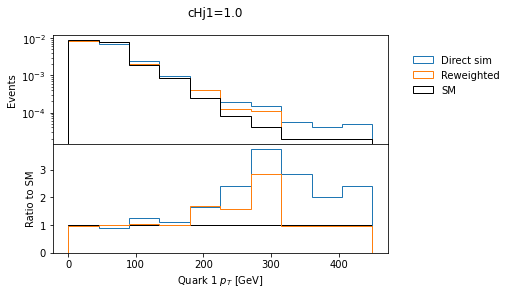

In [11]:
plot_variations(q1pt,q1pt_rw,w,w_rw,w_sm,wc,np.linspace(0,500,11),r'Quark 1 $p_T$ [GeV]')

/uscms_data/d3/jennetd/mc-gen/eft/CMSSW_12_4_8/src/helpers.py:75: RuntimeWarning: invalid value encountered in true_divide
  ax2.hist(bins[:-1],weights=h_var_sm[0]/h_var_sm[0],histtype='step',color='black')
/uscms_data/d3/jennetd/mc-gen/eft/CMSSW_12_4_8/src/helpers.py:76: RuntimeWarning: divide by zero encountered in true_divide
  ax2.hist(bins[:-1],weights=h_var[0]/h_var_sm[0],histtype='step')
/uscms_data/d3/jennetd/mc-gen/eft/CMSSW_12_4_8/src/helpers.py:77: RuntimeWarning: invalid value encountered in true_divide
  ax2.hist(bins[:-1],weights=h_var_rw[0]/h_var_sm[0],histtype='step')


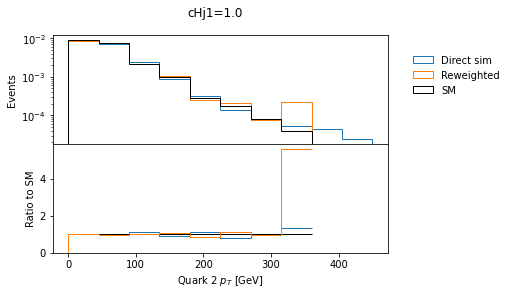

In [12]:
plot_variations(q2pt,q2pt_rw,w,w_rw,w_sm,wc,np.linspace(0,500,11),r'Quark 2 $p_T$ [GeV]')

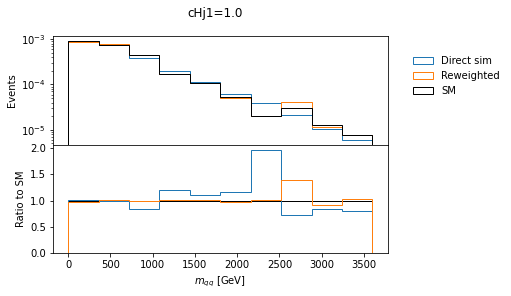

In [13]:
plot_variations(mjj,mjj_rw,w,w_rw,w_sm,wc,np.linspace(0,4000,11),r'$m_{qq}$ [GeV]')

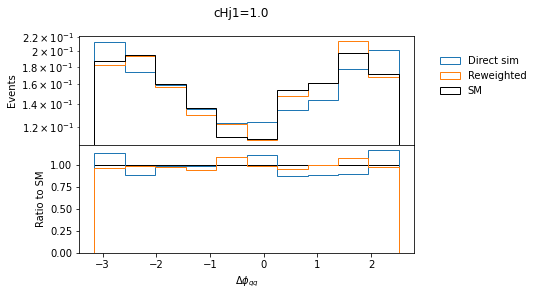

In [14]:
plot_variations(dphijj,dphijj_rw,w,w_rw,w_sm,wc,np.linspace(-3.15,3.15,11),r'$\Delta\phi_{qq}$')

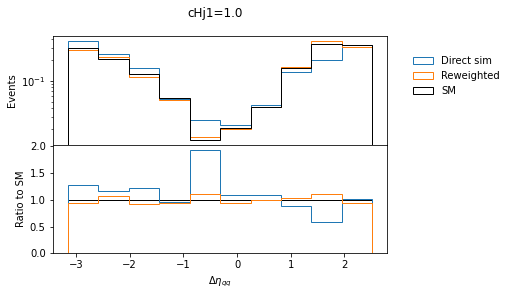

In [15]:
plot_variations(detajj,detajj_rw,w,w_rw,w_sm,wc,np.linspace(-3.15,3.15,11),r'$\Delta\eta_{qq}$')

/uscms_data/d3/jennetd/mc-gen/eft/CMSSW_12_4_8/src/helpers.py:75: RuntimeWarning: invalid value encountered in true_divide
  ax2.hist(bins[:-1],weights=h_var_sm[0]/h_var_sm[0],histtype='step',color='black')
/uscms_data/d3/jennetd/mc-gen/eft/CMSSW_12_4_8/src/helpers.py:76: RuntimeWarning: divide by zero encountered in true_divide
  ax2.hist(bins[:-1],weights=h_var[0]/h_var_sm[0],histtype='step')
/uscms_data/d3/jennetd/mc-gen/eft/CMSSW_12_4_8/src/helpers.py:77: RuntimeWarning: invalid value encountered in true_divide
  ax2.hist(bins[:-1],weights=h_var_rw[0]/h_var_sm[0],histtype='step')


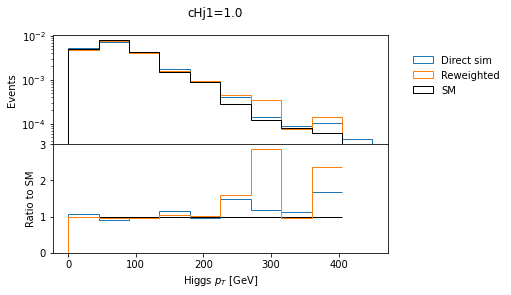

In [16]:
plot_variations(pth,pth_rw,w,w_rw,w_sm,wc,np.linspace(0,500,11),r'Higgs $p_T$ [GeV]')